In [1]:
# https://stackoverflow.com/questions/57422899/modulenotfounderror-no-module-named-jupyter-notebooks
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import contextily as cx
import warnings

try:
    import openpolicedata as opd
except:
    import sys
    sys.path.append('../../openpolicedata')
    import openpolicedata as opd

In [2]:
opd.__version__

'0.11'

In [3]:
us_state_abbrev = {
    'AL' : 'Alabama', 
    'AK' : 'Alaska',
    'AS' : 'American Samoa',
    'AZ' : 'Arizona',
    'AR' : 'Arkansas',
    'CA' : 'California',
    'CO' : 'Colorado',
    'CT' : 'Connecticut',
    'DE' : 'Delaware',
    'DC' : 'District of Columbia',
    'FL' : 'Florida',
    'GA' : 'Georgia',
    'GU' : 'Guam',
    'HI' : 'Hawaii',
    'ID' : 'Idaho',
    'IL' : 'Illinois',
    'IN' : 'Indiana',
    'IA' : 'Iowa',
    'KS' : 'Kansas',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'ME' : 'Maine',
    'MD' : 'Maryland',
    'MA' : 'Massachusetts',
    'MI' : 'Michigan',
    'MN' : 'Minnesota',
    'MS' : 'Mississippi',
    'MO' : 'Missouri',
    'MT' : 'Montana',
    'NE' : 'Nebraska',
    'NV' : 'Nevada',
    'NH' : 'New Hampshire',
    'NJ' : 'New Jersey',
    'NM' : 'New Mexico',
    'NY' : 'New York',
    'NC' : 'North Carolina',
    'ND' : 'North Dakota',
    'MP' : 'Northern Mariana Islands',
    'OH' : 'Ohio',
    'OK' : 'Oklahoma',
    'OR' : 'Oregon',
    'PA' : 'Pennsylvania',
    'PR' : 'Puerto Rico',
    'RI' : 'Rhode Island',
    'SC' : 'South Carolina',
    'SD' : 'South Dakota',
    'TN' : 'Tennessee',
    'TX' : 'Texas',
    'UT' : 'Utah',
    'VT' : 'Vermont',
    'VI' : 'Virgin Islands',
    'VA' : 'Virginia',
    'WA' : 'Washington',
    'WV' : 'West Virginia',
    'WI' : 'Wisconsin',
    'WY' : 'Wyoming'
}

def abbrev2state(state):
    if len(state) == 2: # Otherwise, assume state name was passed in
        state = us_state_abbrev[state.upper()]

    return state

def state2abbrev(state):
    if len(state) != 2:
        try:
            state = next(key for key, value in us_state_abbrev.items() if value == state)
        except:
            print(state)
            raise

    return state

state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [4]:
print(f"Number of states with at least 1 dataset for the entire state {opd.datasets.num_sources(full_states_only=True)}")
print(f"Number of datasets is {opd.datasets.num_unique()}")


Number of states with at least 1 dataset for the entire state 11
Number of datasets is 557


In [5]:
# Need to download https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
import tempfile

# url = "https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip"
# with urlopen(url) as response, tempfile.TemporaryFile() as fp:
#     data = response.read() # a `bytes` object
#     fp.write(data)
#     fp.close()
#     state_file = f"{fp.name}!tl_2021_us_state.shp"
#     state_df = gpd.read_file(state_file)

# resp = urlopen("https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip")
# myzip = ZipFile(BytesIO(resp.read()))
# myzip.namelist()
# unzip = myzip.open('tl_2021_us_state.shp')
# print(unzip.read())
# with tempfile.TemporaryFile() as fp:
#     fp.write(unzip.read())
#     fp.seek(0)
#     state_df = gpd.read_file(fp)

state_file = "./tl_2021_us_state.zip!tl_2021_us_state.shp"
state_df = gpd.read_file(state_file)
state_df = state_df.to_crs("EPSG:4326")

In [6]:
# Need to download from https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip
county_file = "./tl_2021_us_county.zip!tl_2021_us_county.shp"
county_df = gpd.read_file(county_file)
county_df = county_df.to_crs("EPSG:4326")

Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for California because whole state is already marked
Not keeping state police for Massachusetts because whole state is already marked
Not keeping state police for New York because whole state is already marked
Not keeping state police for Virginia because whole state is already marked


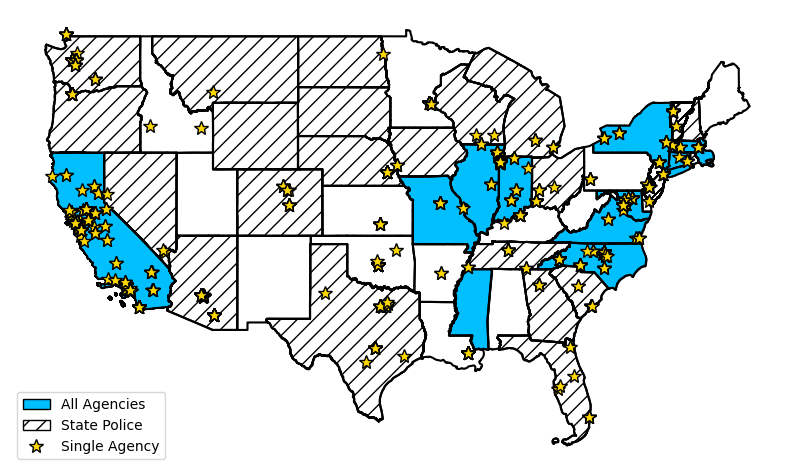

In [7]:
import pandas as pd
import shapely
import os
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us48 = state_df
markersize = 10
state_color = "deepskyblue"
show_legend = True
datasets = opd.datasets.query()
for n in non_continental:
    us48 = us48[us48.STUSPS != n]

fig,ax = plt.subplots(figsize=(10,25))
us48.boundary.plot(ax=ax,edgecolor="black")

min_lat = 360
max_lat = -360
min_lon = 360
max_lon = -360
for val in us48.geometry:
    try:
        if isinstance(val, shapely.Polygon):
            xx, yy = val.exterior.coords.xy
            min_lat = min(min_lat, min(yy))
            max_lat = max(max_lat, max(yy))
            min_lon = min(min_lon, min(xx))
            max_lon = max(max_lon, max(xx))
        elif isinstance(val, shapely.MultiPolygon):
            for line in val.boundary.geoms:
                xx, yy = line.coords.xy
                min_lat = min(min_lat, min(yy))
                max_lat = max(max_lat, max(yy))
                min_lon = min(min_lon, min(xx))
                max_lon = max(max_lon, max(xx))
        else:
            raise TypeError()
    except Exception as e:
        raise

if os.path.exists('Locations.csv'):
    df_lla = pd.read_csv('Locations.csv')
else:
    df_lla = pd.DataFrame(columns=['State','Location','Latitude','Longitude'])

state_patch = mpatches.Patch(facecolor=state_color, edgecolor="black", label='All Agencies')
state_police_patch = mpatches.Patch(hatch="//", edgecolor="black", facecolor="white", label='State Police')
star = mlines.Line2D([], [], linestyle="None", marker="*", markeredgecolor="k" ,markerfacecolor="gold", markersize=markersize, label='Single Agency')

for i in range(len(datasets)):
    if datasets.iloc[i]["State"]=='MULTIPLE':
        continue
    abbrev = state2abbrev(datasets.iloc[i]["State"])

    if opd.defs.MULTI == datasets.iloc[i]["Agency"]:
        state = us48[us48.STUSPS == abbrev]
        state.plot(ax=ax,edgecolor="black",facecolor=state_color)

for i in range(len(datasets)):
    if datasets.iloc[i]["State"]=='MULTIPLE':
        continue
    abbrev = state2abbrev(datasets.iloc[i]["State"])

    if datasets.iloc[i]["Agency"] == "State Patrol" or datasets.iloc[i]["Agency"] == "State Police":
        keep = True
        for j in range(len(datasets)):
            if opd.defs.MULTI == datasets.iloc[j]["Agency"] and \
                datasets.iloc[i]["State"] == datasets.iloc[j]["State"]:
                keep = False
        if keep:
            state = us48[us48.STUSPS == abbrev]
            state.boundary.plot(ax=ax, hatch="//",edgecolor="black")
        else:
            state_str = "State"
            print(f"Not keeping state police for {datasets.iloc[i][state_str]} because whole state is already marked")

for i in range(len(datasets)):
    if datasets.iloc[i]["State"]=='MULTIPLE':
        continue
    abbrev = state2abbrev(datasets.iloc[i]["State"])

    if opd.defs.MULTI == datasets.iloc[i]["Agency"] or \
        datasets.iloc[i]["Agency"] == "State Patrol" or \
        datasets.iloc[i]["Agency"] == "State Police":
        pass
    elif "County" not in datasets.iloc[i]["SourceName"]:
        city_name = datasets.iloc[i]["SourceName"].replace("Police Department","").strip()
        if city_name=="Northhampton":
            city_name="Northampton"

        match = (df_lla['State']==abbrev) & (df_lla['Location']==city_name)
        if match.sum()==1:
            lat = df_lla.loc[match, 'Latitude'].iloc[0]
            lon = df_lla.loc[match, 'Longitude'].iloc[0]
        elif match.sum()>1:
            raise ValueError(f"Multipe matches found for {city_name}, {abbrev}")
        else:
            try:
                city = cx.Place(f"{city_name}, {abbrev}",zoom=1)
                lat = city.latitude
                lon = city.longitude
            except:
                if (city_name == "San Jose" and abbrev=="CA"):
                    lat = 37.3382082
                    lon = -121.8863286
                elif city_name == "Beloit" and abbrev=="WI":
                    lat = 42+30/60+30/3600
                    lon = -(89+1/60+54/3600)
                elif city_name == "Winooski" and abbrev=="VT":
                    lat = 44+29/60+42/3600
                    lon = -(73+10/60+57/3600)
                elif city_name == "Northampton" and abbrev=="MA":
                    lat = 42+20/60
                    lon = -(72+39/60)
                else:
                    raise ValueError(f"{city_name}, {abbrev}. Unable to get place")
                    print(f"Skipping {city_name}, {abbrev}. Unable to get place")
                    continue
            df_lla = pd.concat([df_lla,pd.DataFrame([{"State":abbrev, 'Location':city_name, 'Latitude':lat, "Longitude":lon}])], ignore_index=True)
            df_lla.to_csv("Locations.csv", index=True)

        if lat<min_lat or lat>max_lat or lon<min_lon or lon>max_lon:
            raise ValueError()

        try:
            ax.plot(lon, lat, marker="*", markeredgecolor="k" ,markerfacecolor="gold", markersize=markersize)
        except:
            print(f"Skipping {city_name}, {abbrev}. Unable to plot")
    else:
        county_name = datasets.iloc[i]["SourceName"].replace("Police Department","").strip()
        match = (df_lla['State']==abbrev) & (df_lla['Location']==county_name)
        if match.sum()==1:
            lat = df_lla.loc[match, 'Latitude'].iloc[0]
            lon = df_lla.loc[match, 'Longitude'].iloc[0]
        elif match.sum()>1:
            raise ValueError(f"Multiple matches found for {county_name}, {abbrev}")
        else:
            fips = state_codes[abbrev]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                df = county_df[county_df["STATEFP"]==fips]
                df = df[county_df["NAMELSAD"]==county_name]
                a = df.centroid
            lat = a.y.iloc[0]
            lon = a.x.iloc[0]
            df_lla = pd.concat([df_lla,pd.DataFrame([{"State":abbrev, 'Location':county_name, 'Latitude':lat, "Longitude":lon}])], ignore_index=True)
            df_lla.to_csv("Locations.csv", index=True)

        if lat<min_lat or lat>max_lat or lon<min_lon or lon>max_lon:
            raise ValueError()
        
        try:
            ax.plot(lon, lat, marker="*", markeredgecolor="k" ,markerfacecolor="gold", markersize=markersize)
        except:
            raise ValueError(f"{county_name}, {abbrev}. Unable to get County")
            print(f"Skipping {county_name}, {abbrev}. Unable to plot")

plt.axis('off')
if show_legend:
    ax.legend(handles=[state_patch, state_police_patch, star], loc="lower left")
plt.savefig(r'../OPD_Datasets_Map.png', bbox_inches='tight')
plt.show()